Exercise -1


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. Read and display the image.

• Read the image using the Pillow library and display it.

• You can also use matplotlib to display the image.

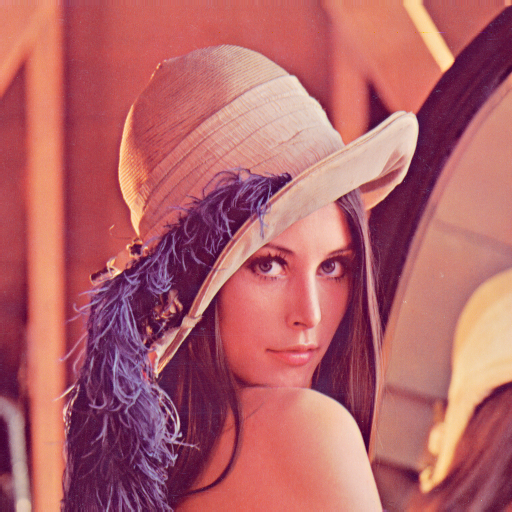

In [13]:
from PIL import Image
# display image in colab
image_colored = Image . open ("/content/drive/MyDrive/image/Lenna_(test_image).png")
display ( image_colored )

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
print ( " Image Format:" , image_colored . format)
print ( " Image Size : " , image_colored . size )
print ( " Image Mode : " , image_colored . mode )

 Image Format: PNG
 Image Size :  (512, 512)
 Image Mode :  RGB


2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

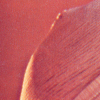

In [16]:
from PIL import Image
# Define the cropping box (left, upper, right, lower)
left, upper, right, lower = 100, 50, 200, 150

# Crop the image
cropped_image = image_colored.crop((left, upper, right, lower))
 # Display the cropped image
display ( cropped_image )

3. Show the three color channels (R, G, B).

• Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

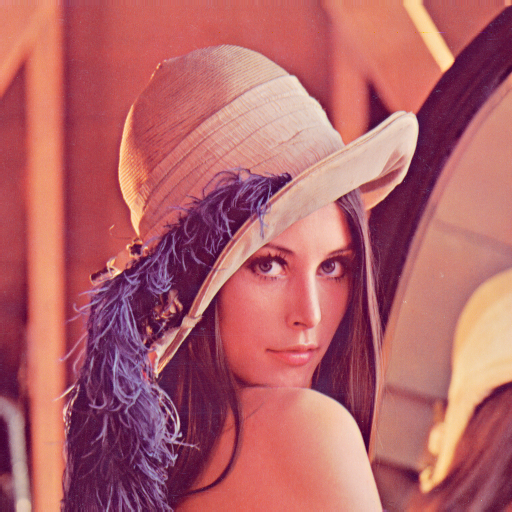

Shape of the image array: (512, 512, 3)


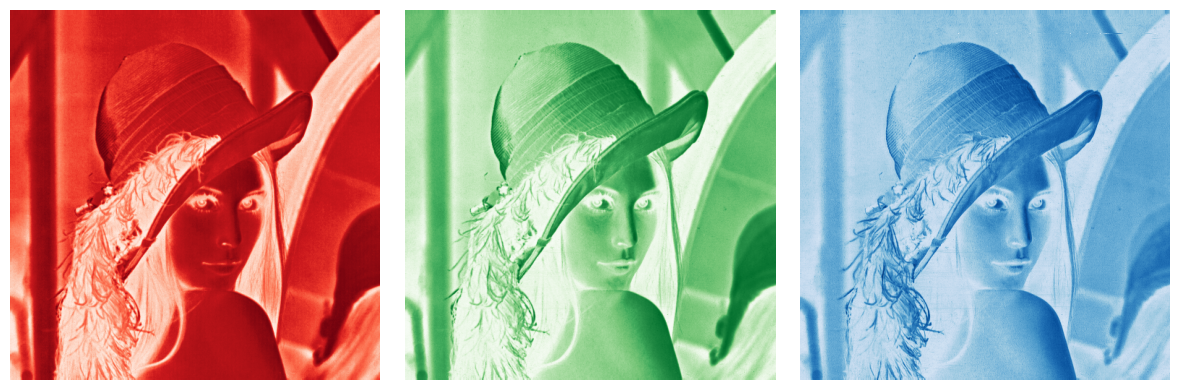

In [18]:
# Load the image
image_colored = Image.open("/content/drive/MyDrive/image/Lenna_(test_image).png")
display(image_colored)

# Convert the Pillow image to a NumPy array
image_array_colored = np.array(image_colored)

# Display the shape of the NumPy array (height, width, channels)
print("Shape of the image array:", image_array_colored.shape)

# Separate the color channels
red_channel = image_array_colored[:, :, 0]  # Red channel
green_channel = image_array_colored[:, :, 1]  # Green channel
blue_channel = image_array_colored[:, :, 2]  # Blue channel

# Create subplots to display the channels
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display each channel with proper labels
axes[0].imshow(red_channel, cmap='Reds')
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens')
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues')
axes[2].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

• Modify the pixel values of the top-left 100 × 100 region to have a value of 210 (which is a
light gray color), and then display the modified image.

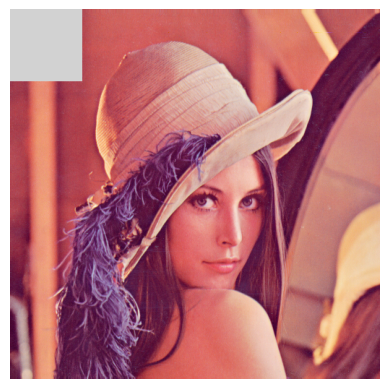

In [19]:
image_array_colored [:100,:100]=[210,210,210]
plt.imshow(image_array_colored)
plt.axis('off')
plt.show()

2.2 Exercise - 2:

Complete all the Task.


1. Load and display a grayscale image.

• Load a grayscale image using the Pillow library.

• Display the grayscale image using matplotlib.

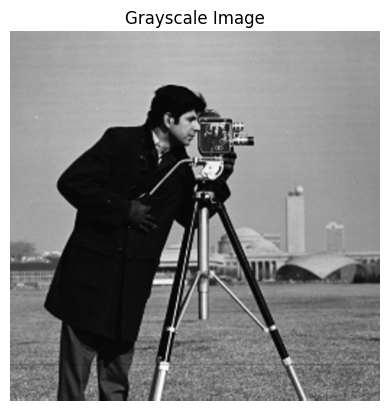

In [21]:
# Load the grayscale image using PIL
image_path = "/content/drive/MyDrive/image/cameraman.png"  # Update with your image path
grayscale_image = Image.open(image_path).convert('L')  # Open and convert to grayscale

# Display the grayscale image using Matplotlib
plt.imshow(grayscale_image, cmap="gray")  # Display in grayscale
plt.axis("off")  # Hide axes
plt.title("Grayscale Image")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

• Extract a 150 pixel section from the center of the image using NumPy array slicing.

• Display this cropped image using matplotlib.

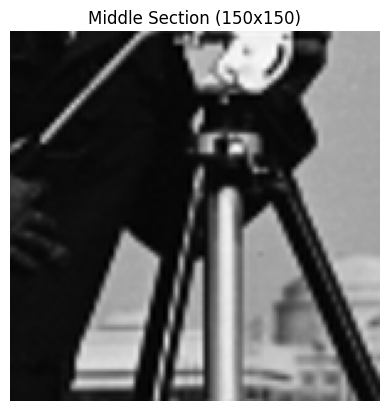

In [22]:


# 2. Convert to NumPy Array
image_array = np.array(grayscale_image)

# 3. Determine Image Dimensions
height, width = image_array.shape

# 4. Calculate Center Coordinates
crop_size = 150
start_row = (height - crop_size) // 2
start_col = (width - crop_size) // 2

# 5. Extract the Middle Section
cropped_image = image_array[start_row:start_row + crop_size, start_col:start_col + crop_size]

# 6. Display the Cropped Image
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.title("Middle Section (150x150)")
plt.show()


3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

• Apply a threshold to the grayscale image: set all pixel values below 100 to 0, and all values above 100 to 255 (creating a binary image).

• Display the resulting binary image.

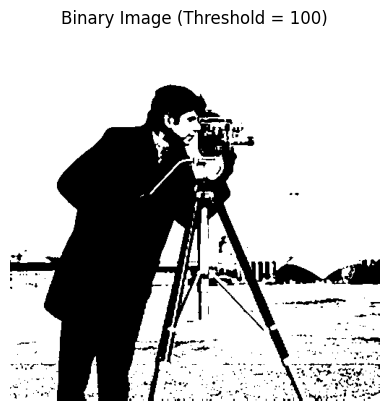

In [23]:
# 2. Convert to NumPy Array
image_array = np.array(grayscale_image)

# 3. Apply Thresholding
threshold = 100
binary_image = np.where(image_array < threshold, 0, 255)

# 4. Display the Binary Image
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.title("Binary Image (Threshold = 100)")
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

• Rotate the image by 90 degrees clockwise using the Pillow rotate method or by manipulating the image array.

• Display the rotated image using matplotlib.

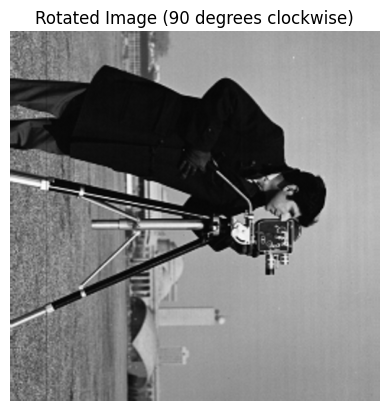

In [24]:
# 2. Rotate the Image
rotated_image = grayscale_image.rotate(-90, expand=True)  # Rotate 90 degrees clockwise

# 3. Display the Rotated Image
plt.imshow(rotated_image, cmap="gray")
plt.axis("off")
plt.title("Rotated Image (90 degrees clockwise)")
plt.show()

5. Convert the grayscale image to an RGB image.

• Convert the grayscale image into an RGB image where the grayscale values are replicated across all three channels (R, G, and B).

• Display the converted RGB image using matplotlib.

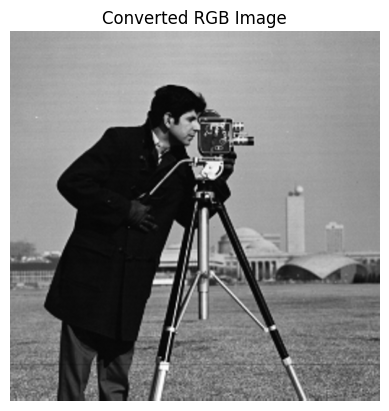

In [25]:
# 2. Convert to NumPy Array
image_array = np.array(grayscale_image)

# 3. Replicate Channels
rgb_image_array = np.stack((image_array, image_array, image_array), axis=-1)

# 4. Convert Back to Image
rgb_image = Image.fromarray(rgb_image_array)

# 5. Display the RGB Image
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Converted RGB Image")
plt.show()

3 Image Compression and Decompression using PCA.
1. Load and Prepare Data:
• Fetch an image of you choice.{If colour convert to grayscale}

• Center the dataset - Standaridze the Data.

• Calculate the covaraince matrix of the Standaridze data.

In [35]:
# Image Path
image_path = "/content/drive/MyDrive/image/lena_gray.gif"

# Load the image using PIL
try:
    image = Image.open(image_path)
    if image.mode != 'L':
        image = image.convert('L')  # Convert to grayscale if not already
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
    exit()
except Exception as e:
    print(f"An error occurred while loading the image: {e}")
    exit()

# 2. Convert to NumPy Array and force to have a float type
image_array = np.array(image).astype(np.float64)

# 3. Flatten the Image
flattened_image_array = image_array.flatten()

# Reshape to a column vector (N x 1)
flattened_image_array = flattened_image_array.reshape(-1, 1)

# 4. Center the Data
mean = np.mean(flattened_image_array, axis=0)
centered_data = flattened_image_array - mean

# 5. Standardize the Data
std_dev = np.std(centered_data, axis=0)
standardized_data = centered_data / std_dev

# --- 6. Calculate the Covariance Matrix ---
covariance_matrix = np.cov(standardized_data, rowvar=False)

print("Shape of the standardized data:", standardized_data.shape)
print("Shape of the covariance matrix:", covariance_matrix.shape)

Shape of the standardized data: (262144, 1)
Shape of the covariance matrix: ()


2. Eigen Decomposition and Identifying Principal Components:
• Compute Eigen Values and Eigen Vectors.

• Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

• Identify the Principal Components with the help of cumulative Sum plot.

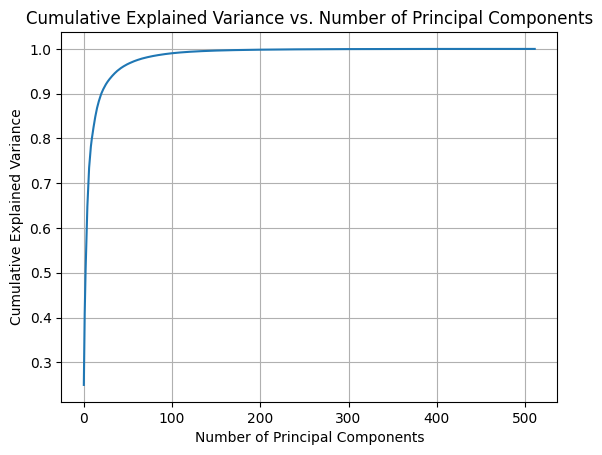

Shape of the eigenvalues: (512,)
Shape of the eigenvectors: (512, 512)


In [37]:


# 2. Convert to NumPy Array and force to have a float type
image_array = np.array(image).astype(np.float64)

# Reshape to have each row as a sample
reshaped_image_array = image_array.reshape((image_array.shape[0], -1))


# 3. Center the Data
mean = np.mean(reshaped_image_array, axis=0)
centered_data = reshaped_image_array - mean

# 4. Calculate the Covariance Matrix
covariance_matrix = np.cov(centered_data, rowvar=False)


# 1. Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 2. Sort Eigenvalues and Eigenvectors
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 3. Cumulative Sum Plot
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Plot the cumulative explained variance
plt.plot(cumulative_variance_ratio)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.grid(True)
plt.show()
print("Shape of the eigenvalues:", eigenvalues.shape)
print("Shape of the eigenvectors:", eigenvectors.shape)
# 4. Identify the Principal Components

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

• Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

• Display the Results and Evaluate.

Number of components for each threshold: [3, 7, 21, 100]


<ipython-input-38-13b92fca80f2>:58: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)


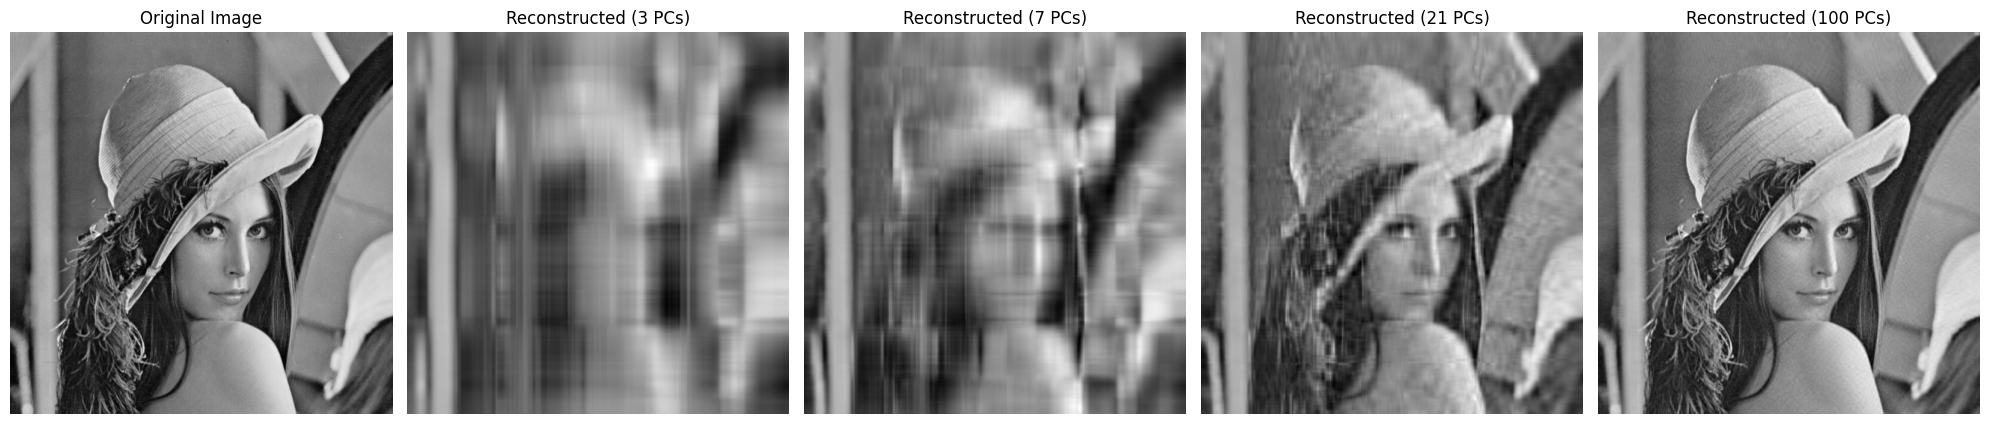

In [38]:
# 2. Convert to NumPy Array and force to have a float type
image_array = np.array(image)
reshaped_image_array = image_array.reshape((image_array.shape[0], -1))
# 3. Center the Data
mean = np.mean(reshaped_image_array, axis=0)
centered_data = reshaped_image_array - mean

# 4. Calculate the Covariance Matrix
covariance_matrix = np.cov(centered_data, rowvar=False)

# 1. Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# 2. Sort Eigenvalues and Eigenvectors
# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# --- 2. Select Principal Components ---
# Let's pick some variance thresholds (you can change these)
variance_thresholds = [0.5, 0.7, 0.9, 0.99]
num_components_list = []

for threshold in variance_thresholds:
    num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    num_components_list.append(num_components)

print("Number of components for each threshold:", num_components_list)

# --- 3. & 4. Project, Reconstruct, and Display ---
plt.figure(figsize=(20, 5))

# Display the original image
plt.subplot(1, len(num_components_list) + 1, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, num_components in enumerate(num_components_list):
    # Select top eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Project the centered data onto the selected eigenvectors (lower-dimensional representation)
    projected_data = np.dot(centered_data, selected_eigenvectors)

    # Reconstruct the data (transform back to original space)
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)

    # Add back the mean
    reconstructed_data += mean

    # Reshape back to image dimensions
    reconstructed_image = reconstructed_data.reshape(image_array.shape)

    # Ensure pixel values are in the correct range [0, 255]
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    # Display
    plt.subplot(1, len(num_components_list) + 1, i + 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f"Reconstructed ({num_components} PCs)")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Conclusion for Different Values of k

In PCA, the number of principal components `k` defines how much the iamge is  **compressed** and **image quality** is preserved. From the plot above, we can conclude the following:

### k = 20
- The reconstructed image is heavily blurred.
- Significant loss of fine details and textures.
- This represents **high compression** but with poor visual quality.

### k = 50
- Image quality improves compared to `k = 20`.
- Some edges and features are visible, but fine details are still missing.
- This represents **moderate compression** with acceptable quality.

### k = 100
- The reconstructed image is much closer to the original.
- Most important details and textures are preserved.
- This offers a **good balance between compression and quality**.

### k = 150
- The image is almost identical to the original.
- Very little quality loss can be observed.
- This represents **low compression** but with **high reconstruction quality**.

---

### Final Takeaway

- **Smaller k** results in stronger compression but poorer image quality.
- **Larger k** preserves more visual information but reduces compression efficiency.
- The **optimal value of k** depends on the specific use case — whether the goal is to save storage space or keep high visual clarity. In case of the image above the value of `100` seems to preserve all the quality with still compressing it.

This shows the classic **trade-off between compression and reconstruction accuracy**, which is the key concept in PCA-based image compression.
